In [96]:
import os 
words = open(os.path.join('makemore','names.txt'), 'r').read().splitlines()

In [97]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [98]:
emma
mma    

NameError: name 'emma' is not defined

In [ ]:
# Create special character to denote start and end character of the word
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        #print(ch1, ch2)
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1


In [ ]:
import torch
N = torch.zeros((28, 28), dtype=torch.int32)

In [ ]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i for i,s in enumerate(chars)}
stoi['<S>'] = 26
stoi['<E>'] = 27

In [ ]:
N = torch.zeros((28, 28), dtype=torch.int32)
chars = sorted(list(set(''.join(words))))
stoi = {s:i for i,s in enumerate(chars)}
stoi['<S>'] = 26
stoi['<E>'] = 27

for w in words:
  chs = ['<S>'] + list(w) + ['<E>']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1, ix2] += 1

In [ ]:
b[('a','a')]

556

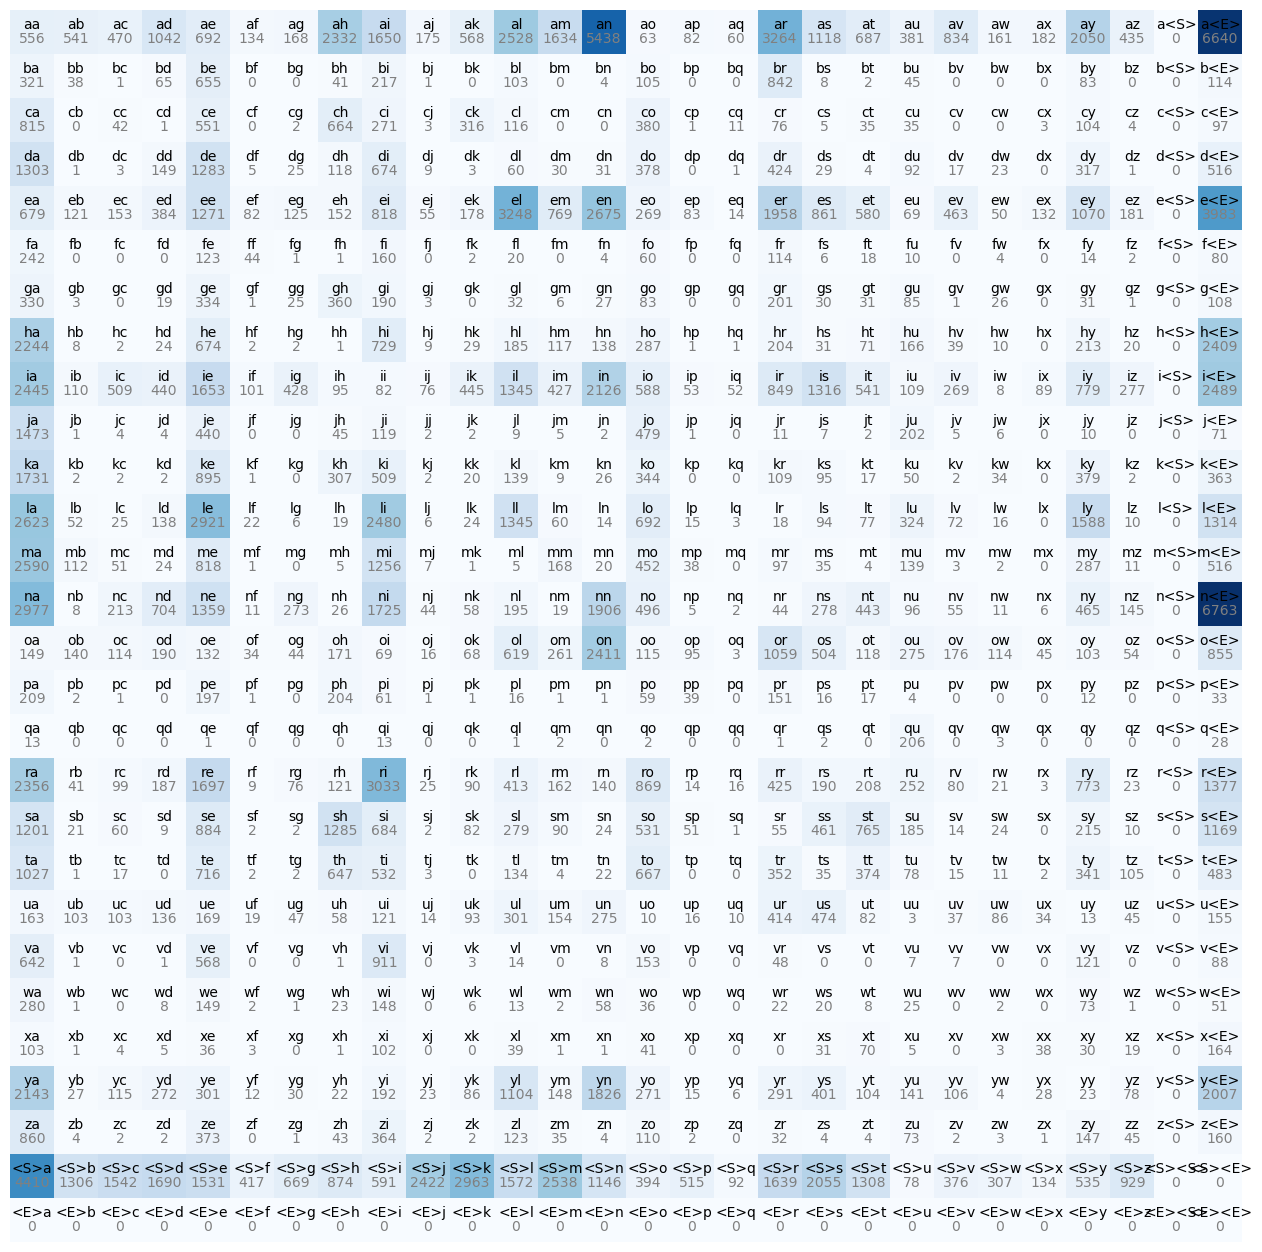

In [ ]:
# Visualize the table
import matplotlib.pyplot as plt
%matplotlib inline
itos = {i:s for s,i in stoi.items()}
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(28):
    for j in range(28):
        chstr = itos[i] + itos[j]
        # chstr = str(i)+str(j)
        plt.text(j, i, chstr, ha="center", va="bottom", color='black')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [ ]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [ ]:
N = torch.zeros(27,27, dtype=torch.int32)
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1, ix2] += 1

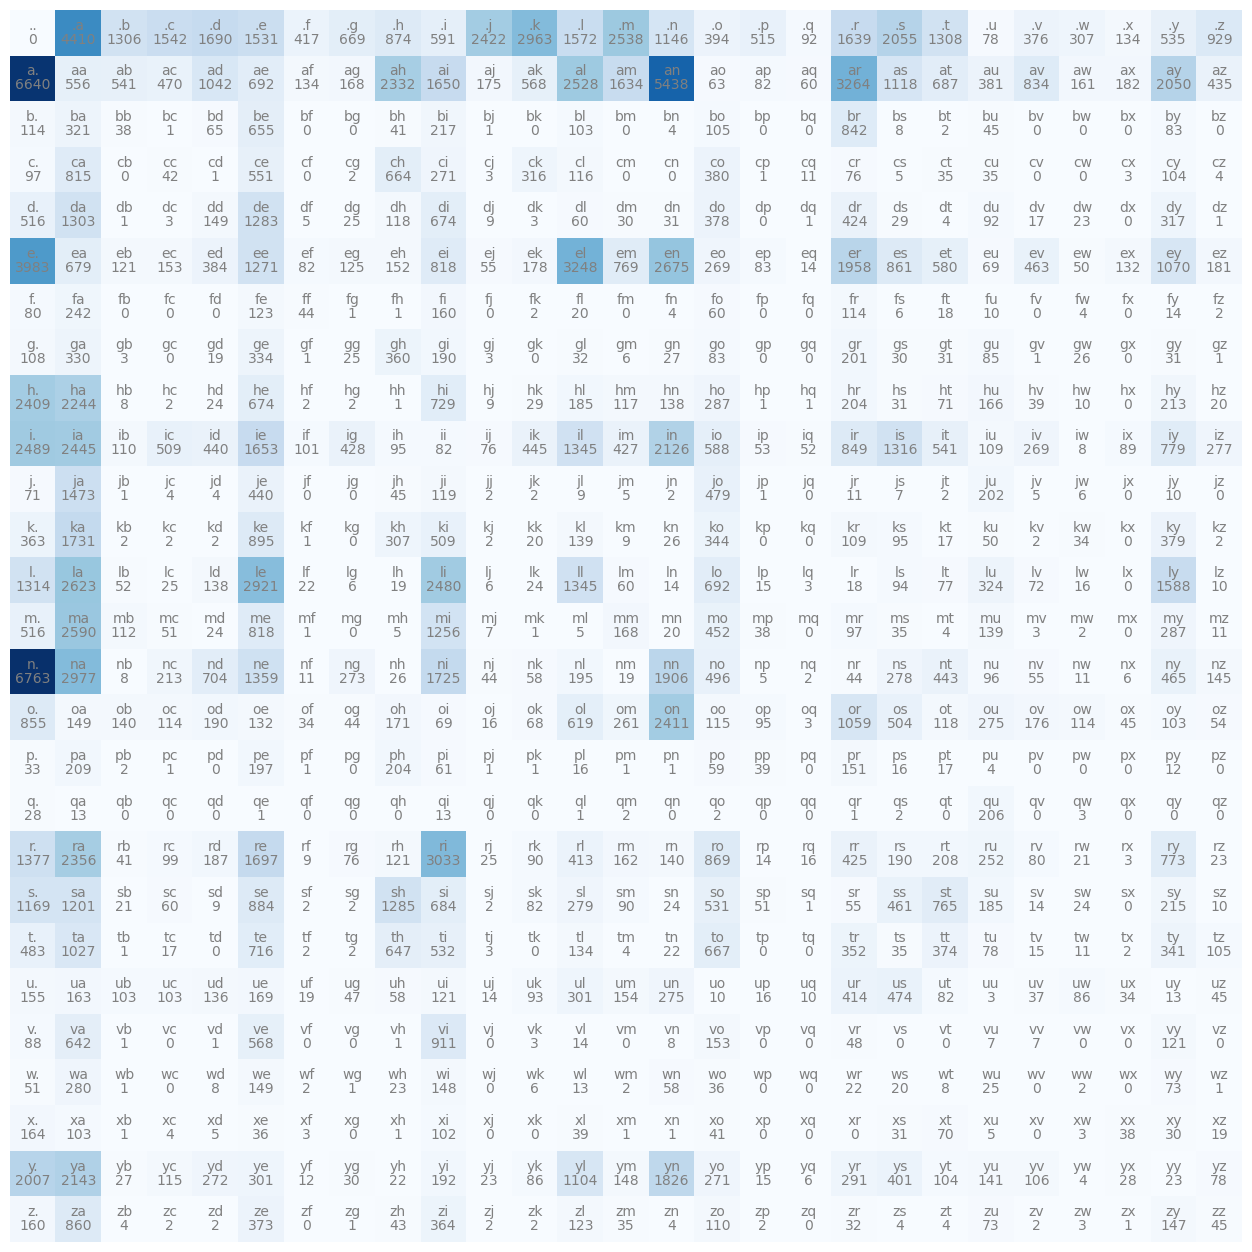

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [ ]:
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [ ]:
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [ ]:
g = torch.Generator().manual_seed(2147483648)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'c'

In [ ]:
# Label smoothing
P = (N+1).float()
P /= P.sum(1, keepdims=True)

In [ ]:
g = torch.Generator().manual_seed(2147483647)

for i in range(100):
  
  out = []
  ix = 0
  while True:
    p = P[ix]
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))


junide.
janasah.
p.
cony.
a.
nn.
kohin.
tolian.
juee.
ksahnaauranilevias.
dedainrwieta.
ssonielylarte.
faveumerifontume.
phynslenaruani.
core.
yaenon.
ka.
jabdinerimikimaynin.
anaasn.
ssorionsush.
dgossmitan.
il.
le.
pann.
that.
janreli.
isa.
dyn.
rijelumemahaunayaleva.
cararr.
jen.
janarta.
maly.
abely.
a.
i.
lavadoni.
themielyawat.
f.
modam.
tavilitikiesaloeverin.
n.
e.
kalbrenelah.
anen.
ch.
k.
jan.
odridrdenanialilpergha.
tezralelia.
vymalelvan.
hiahimahacelahmimi.
rasabyoni.
pe.
aliaierenn.
jayannda.
r.
ceremankesorannje.
sanoman.
kyn.
deriganazirdab.
ta.
on.
bahatelyti.
keus.
dasa.
en.
ton.
codarerlaspphalealilondesl.
finna.
m.
m.
shana.
ve.
h.
moge.
jaresynivien.
usien.
ja.
jenam.
anth.
marafrlanlylialeyngarirriyli.
msoireviayitarkannzyaneniadahulyl.
cichatavryaelesh.
rla.
s.
jau.
brialieri.
kha.
nerarh.
hisisarilakamorvann.
akela.
az.
arileri.
chaiadayra.
ferlodouseyton.
za.
sabran.
han.
ke.


In [ ]:
# GOAL: maximize likelihood of the data w.r.t. model parameters (statistical modeling)
# equivalent to maximizing the log likelihood (because log is monotonic)
# equivalent to minimizing the negative log likelihood
# equivalent to minimizing the average negative log likelihood

# log(a*b*c) = log(a) + log(b) + log(c)
# negative log likelihood is the measure of quality of the modeling

In [109]:
log_likelihood = 0.0
n = 0

for w in words:
# for w in ["andrejq"]:
#for w in ["ken"]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    prob = P[ix1, ix2]
    logprob = torch.log(prob)
    log_likelihood += logprob
    n += 1
    #print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

log_likelihood=tensor(-559951.5625)
nll=tensor(559951.5625)
2.4543561935424805


In [ ]:
# create the training set of bigrams (x,y)
xs, ys = [], []

for w in words[:1]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    print(ch1, ch2)
    xs.append(ix1)
    ys.append(ix2)
    
xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


In [ ]:
xs

tensor([ 0,  5, 13, 13,  1])

In [ ]:
ys

tensor([ 5, 13, 13,  1,  0])

In [ ]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

$$\sigma(z_i) = \frac{e^{z_{i}}}{\sum_{j=1}^K e^{z_{j}}} \ \ \ for\ i=1,2,\dots,K$$

In [ ]:
# Equivalent to a single layer neural network with 27 hidden neurons.
# No activation function and no bias
W = torch.randn((27, 27))

logits = xenc @ W # log-counts or logits
counts = logits.exp() # equivalent N
probs = counts / counts.sum(1, keepdims=True) # Softmax
probs;

In [ ]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
g = torch.Generator().manual_seed(2147483647 + 1)
W = torch.randn((27, 27), generator=g)

In [ ]:
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
# btw: the last 2 lines here are together called a 'softmax'    

In [ ]:

nlls = torch.zeros(5)
for i in range(5):
  # i-th bigram:
  x = xs[i].item() # input character index
  y = ys[i].item() # label character index
  print('--------')
  print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
  print('input to the neural net:', x)
  print('output probabilities from the neural net:', probs[i])
  print('label (actual next character):', y)
  p = probs[i, y]
  print('probability assigned by the net to the the correct character:', p.item())
  logp = torch.log(p)
  print('log likelihood:', logp.item())
  nll = -logp
  print('negative log likelihood:', nll.item())
  nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

--------
bigram example 1: .e (indexes 0,5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0049, 0.0959, 0.0281, 0.0703, 0.0961, 0.0573, 0.0241, 0.0135, 0.0093,
        0.1416, 0.0225, 0.0217, 0.0513, 0.0106, 0.0097, 0.0291, 0.0229, 0.0273,
        0.0325, 0.0275, 0.0446, 0.0501, 0.0214, 0.0093, 0.0120, 0.0354, 0.0310])
label (actual next character): 5
probability assigned by the net to the the correct character: 0.05734505504369736
log likelihood: -2.858668565750122
negative log likelihood: 2.858668565750122
--------
bigram example 2: em (indexes 5,13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0426, 0.0113, 0.0266, 0.0507, 0.2370, 0.0580, 0.0421, 0.0094, 0.0136,
        0.0297, 0.0044, 0.0782, 0.1028, 0.0146, 0.0172, 0.0288, 0.0263, 0.0319,
        0.0248, 0.0210, 0.0063, 0.0057, 0.0309, 0.0269, 0.0298, 0.0089, 0.0205])
label (actual next character): 13
probability assigned by the net to the the correct character: 0.

In [ ]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [103]:
# forward pass
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character


# prob[0, 5], prob[1, 13], prob[2, 13], prob[3,1], prob[4,0]

loss = -probs[torch.arange(5), ys].log().mean()

In [104]:
print(loss.item())

3.7291626930236816


In [101]:
# backward pass
W.grad = None # set to zero the gradient
loss.backward()

In [102]:
W.data += -0.1 * W.grad

In [105]:
# create the dataset
xs, ys = [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

number of examples:  228146


In [108]:
# gradient descent
for k in range(1000):
  
  # forward pass
  xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
  logits = xenc @ W # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
  print(loss.item())
  
  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()
  
  # update
  W.data += -50 * W.grad

2.4891624450683594
2.4890148639678955
2.488870859146118
2.48872971534729
2.4885921478271484
2.4884581565856934
2.4883270263671875
2.488198757171631
2.4880735874176025
2.4879512786865234
2.4878318309783936
2.487715005874634
2.487600326538086
2.4874887466430664
2.487379550933838
2.4872729778289795
2.487168312072754
2.4870662689208984
2.486966133117676
2.486868381500244
2.4867727756500244
2.4866788387298584
2.4865872859954834
2.486497163772583
2.4864091873168945
2.486323118209839
2.486238718032837
2.4861559867858887
2.4860754013061523
2.4859957695007324
2.4859180450439453
2.485841751098633
2.485767126083374
2.4856936931610107
2.485621929168701
2.485551357269287
2.485482692718506
2.485414743423462
2.4853484630584717
2.485283136367798
2.4852192401885986
2.485156536102295
2.4850947856903076
2.485034465789795
2.484975576400757
2.484916925430298
2.4848597049713135
2.4848034381866455
2.484748363494873
2.484694719314575
2.4846413135528564
2.484589099884033
2.4845376014709473
2.4844870567321777
2

In [110]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
  
  out = []
  ix = 0
  while True:
    
    # ----------
    # BEFORE:
    #p = P[ix]
    # ----------
    # NOW:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------
    
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

junide.
janasah.
p.
cfay.
a.


In [111]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt # for making figures
%matplotlib inline

In [113]:
words = open(os.path.join('makemore','names.txt'), 'r').read().splitlines()

In [114]:
# build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [115]:
# build the dataset

block_size = 3 # context length: how many characters do we take to predict the next one?
X, Y = [], []
for w in words:
  
  #print(w)
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    #print(''.join(itos[i] for i in context), '--->', itos[ix])
    context = context[1:] + [ix] # crop and append
  
X = torch.tensor(X)
Y = torch.tensor(Y)

In [116]:
X

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        ...,
        [26, 26, 25],
        [26, 25, 26],
        [25, 26, 24]])

In [117]:
Y

tensor([ 5, 13, 13,  ..., 26, 24,  0])

In [133]:
# build the dataset
block_size = 3 # context length: how many characters do we take to predict the next one?

def build_dataset(words):  
  X, Y = [], []
  for w in words:

    #print(w)
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '--->', itos[ix])
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])


torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [119]:
C = torch.randn((27, 2))

In [120]:
emb = C[X]
emb.shape

torch.Size([228146, 3, 2])

In [122]:
emb.view(-1, 6).shape

torch.Size([228146, 6])

In [124]:
W1 = torch.randn((6, 100))
b1 = torch.randn(100)

In [125]:
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)

In [126]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)
logits = h @ W2 + b2

In [127]:
logits.shape

torch.Size([228146, 27])

In [156]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [157]:
sum(p.nelement() for p in parameters) # number of parameters in total

11897

In [158]:
for p in parameters:
  p.requires_grad = True

In [159]:
lri = []
lossi = []
stepi = []

In [149]:
# lre = torch.linspace(-3, 0, 1000)
# lrs = 10**lre

In [160]:
for i in range(20000):
  
  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (32,))
  
  # forward pass
  emb = C[Xtr[ix]] # (32, 3, 10)
  h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 200)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ix])
  print(loss.item())
  
  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()
  
  # update
  # lr = lrs[i]
  lr = 0.1 if i < 100000 else 0.01
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  # lri.append(lre[i])
  stepi.append(i)
  lossi.append(loss.log10().item())

print(loss.item())

23.8320369720459
26.12020492553711
25.901430130004883
22.615604400634766
21.362424850463867
20.399250030517578
20.557462692260742
18.82733917236328
17.706886291503906
17.169031143188477
19.9151668548584
17.337045669555664
19.674976348876953
13.713273048400879
16.58199119567871
17.26388168334961
18.130165100097656
15.400090217590332
14.909496307373047
13.511746406555176
13.868213653564453
15.889294624328613
14.137451171875
16.40952491760254
14.164640426635742
16.0804443359375
12.667757034301758
13.472318649291992
11.687768936157227
12.81820011138916
11.884965896606445
15.294012069702148
15.231411933898926
11.828910827636719
11.019881248474121
12.255163192749023
16.831357955932617
13.657702445983887
13.44505500793457
11.47627067565918
15.386077880859375
12.590964317321777
8.278104782104492
12.421592712402344
12.523956298828125
12.486577987670898
11.283539772033691
12.747269630432129
11.552029609680176
11.293136596679688
12.413084030151367
11.527873039245605
8.73646068572998
7.80215263366

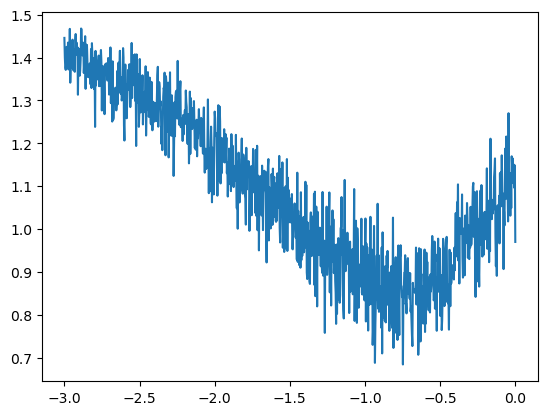

In [153]:
plt.plot(lri, lossi)

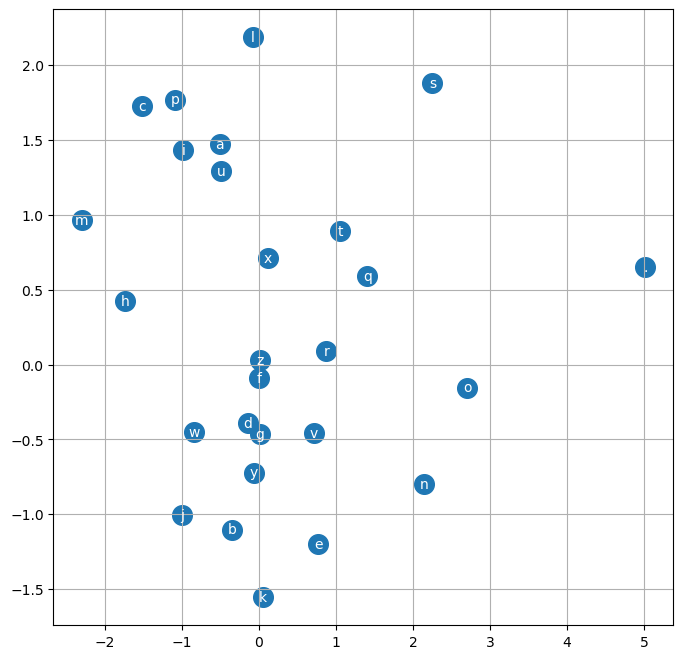

In [154]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [163]:


# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(200):
    
    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

erianimyanneeen.
naheyah.
rethan.
ekdrlee.
aderedoel.
ihell.
relle.
eliean.
aar.
kayzion.
karin.
sherergahiriel.
kener.
jererenberori.
brenge.
ryyah.
emerg.
kay.
hhoklyan.
harnaamylerun.
zarel.
juren.
cre.
kavekoer.
prren.
fenkoe.
bherpeir.
racleah.
khmoron.
ise.
rif.
evorennlee.
arter.
shikee.
kera.
aliren.
dabilie.
aamellare.
armon.
xayn.
hhkeg.
kene.
kayno.
aud.
rive.
rih.
varle.
ajayena.
moo.
grrickarii.
khilon.
etraynn.
lore.
prry.
nog.
ameor.
zyrikonemee.
therabel.
jayc.
ama.
corarley.
dare.
emackeni.
seven.
haelemo.
gorynah.
rackuppon.
cora.
then.
kenna.
mranon.
taresson.
san.
jaylani.
rcireton.
rhad.
ehima.
ana.
layaanuem.
tegly.
keneson.
iur.
kaler.
alenen.
revenlineshartion.
lee.
rie.
qwen.
dakeroranlee.
kenva.
gak.
raholt.
jayvinn.
lye.
johrie.
nabhit.
cerrin.
rammor.
jahleenf.
areen.
esy.
kor.
kegenner.
rheayamrtin.
kamrlee.
thereerelerah.
jirianna.
rye.
khoron.
lad.
kalen.
brarodf.
reshaamil.
knfek.
hher.
gheonefmann.
thi.
jace.
heed.
destorian.
racharile.
arm.
kyrley.
elv